# Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that is now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the a data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [2]:
#importing the modules required
import numpy as np
import pandas as pd







In [3]:
#importing the dataset
df = pd.read_csv('50_Startups.csv')

#Overview of the dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Overview of Dataset.

1. R&D Spend = Amount of Money Invested in it.
2. Administration = Amount of Money Invested in it.
3. Marketing Spend = Amount of Money Spend in it.
4. State = Different States in which companies have invested.
5. Profit = Amount of Profit Generated.


## Assigning the Dataset to X and y Variable.

In this case we will put the Simple Linear regression.
We will take one dependent variable(Marketing Spend) and will predict the Profit based upon that.

Hence we will split our X and y variables accordingly

In [4]:
X = df.iloc[:, 2].values #Column for marketing spend(Dependent Variable)
y = df.iloc[:, -1].values #Column for Profit(Independent variable)


In [5]:
#Overview of X variable
#print(X)
X = X.reshape(-1,1)
X.shape

(50, 1)

In [6]:
#Overview of y Variable
#print(y)
y.shape

(50,)

## Spliting the dataset into the Training and Testing set

In [7]:
#We will use `sklearn` library and import `train_test_split`
from sklearn.model_selection import train_test_split

#We will split the data into train and test for X and y varaible.
# We will split the data into 80% and 20% for train and test sets.
# We will keep the random state as 1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


## Training the Simple Linear Regression model on training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
y_pred = regressor.predict(X_test)


In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[149947.25 105008.31]
 [113754.07  96479.51]
 [105733.87  78239.91]
 [108790.14  81229.06]
 [163366.73 191050.39]
 [157304.17 182901.99]
 [ 63381.4   35673.41]
 [ 89641.17 101004.64]
 [136204.58  49490.75]
 [ 85003.82  97483.56]]


## The above prediction is based upon Simple Linear Regression when taking only 1 dependent varaiable.

As we can see that the Profit output is not as accurate as we expected it to be, because the prediction depends on more than 1 variable and we will see in the following cells that how does the predicitions becomes better. 

## Visualisation of results

In [11]:
#importing the matplotlib library
import matplotlib.pyplot as plt

## Training Set Scatter Plot

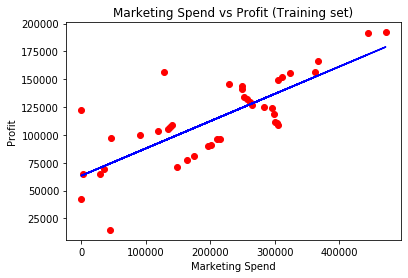

In [12]:
#plotting scatter plot for X_train and y_train
plt.scatter(X_train, y_train, color = 'red')

#plotting regressor line for it
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

#plotting the Title
plt.title('Marketing Spend vs Profit (Training set)')

#Labeling X
plt.xlabel('Marketing Spend')

#Labeling y
plt.ylabel('Profit')


plt.show()

## Testing Set Scatter Plot

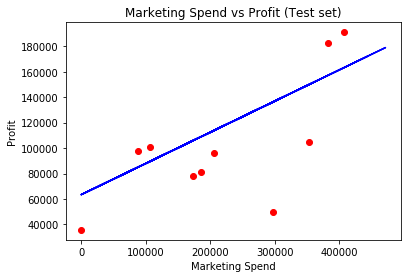

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Marketing Spend vs Profit (Test set)')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

**The Blue line is the Simple Linear Regression line drawn by ML model and to get the formula for this line, we have discussed about it in the following codes.**

## Making a single prediction


In [14]:
print(regressor.predict([[385000]]))

[157745.45]


Therefore our Model predict the Profit of a company with marketing spend 385,000 dollars as 157,745 dollars

In [15]:
#regressor Coefficient
print(regressor.coef_)

#regressor.intercept
print(regressor.intercept_)

[0.25]
63381.40444764745


### Hence the Equation of our Simple Linear Regression model is:

# Profit = 0.245 * Marketting Spent + 63381.404

# Instead of Applying Simple Linear Regression we will apply Multiple Linear Regression in this part.
**Because there are multiple variables that plays their part in Prediction of profits.**

Let's see what happens when we consider more than one independent variable for this same dataset to predict the output.

**For the state variable we will use OneHotEncoder**

The Technique is almost similar as above with just few changes.

In [16]:
df1 = pd.read_csv('50_Startups.csv')
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values


In [17]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [18]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding Categorical Data


In [19]:
#importing ColumnTransformer from sklearn
from sklearn.compose import ColumnTransformer

#importing OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

#Encoding categorical data = Converting the states into dummy variables vector form.
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

#Fitting it into X
X = np.array(ct.fit_transform(X))

In [20]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

### As you can see that the state columns are encoded now.

### Splitting the dataset into the Training set and Test set


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training the Multiple Linear Regression model on the Training set

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 5: Filter Results and Build/Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [26]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


### These are the predictions for the Test sets based upon our Multiple Linear Regression Model.

## Making a single Prediction
for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California'

In [27]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


In [28]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853204


### Profit=86.6×Dummy State1 − 873×Dummy State2 + 786×Dummy State3 + 0.773×R&D Spend + 0.0329×Administration + 0.0366×Marketing Spend + 42467.53

Hence the equation for Multiple Linear Regression turns out to be this.
The equation shows us that the profit depends upon all these variables and by using this we can predict the Profit.

## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Visualisation for Simple Linear Regression has been made in the above code and we cannot plot Visualisation for Multiple Linear Regression in this dataset.
**Because earlier it was 1 dependent and 1 independent variable and we plotted them in a 2-D graph, but now there are 4 feature variable and 1 dependent variable, so we need a 5-D graph(Which is not possible to Visualise by Humans).**


## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



#Stage1 = Project Definition = Well I have defined about the project and the story about it, how it gonna work.
#Stage2 = Data Acquisition = Well I have acquired the data from kaggle and also have provided the url for that and everything else can be seen from the kaggle website itself.
#Stage3 = Data shaping and Carpentry = Data had been cleaned and one hot encoding has been applied to it, for better and meaningull results.
#Stage 4 = Exploratory Data analysis and visualisation = Well I have analysed the data and made some scattered plot for better visualisation.
#Stage5 = Machine Learning Model Planning and Building Testing = Well I have applied two different machine learning model and compared them with each other and saw how are the two different from one another.
#Stage6 = ML Model Validation = Multiple Linear regression model has been applied and output for that has been seen in the project.
#Stage7 = Data Story = Story has been told about how it works and how helpull the model is in predicting different future outcomes.
#Stage8 = ML Model Deployment = Multiple Machine learning model applied in this project tells us that how can it be used to predicting single output with different dependent variable.

# Save your notebook, then `File > Close and Halt`